## 実習の事前準備

最初にライブラリのインポート、グラフ表示の設定などを行います。このレッスンではグラフ描画に seaborn を使用し、その使い方を学びます。import seaborn as sns の記述を追加します。

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

# seabornの装飾を適用する
sns.set_theme()

/Users/MisayoMacBookPro/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


このレッスンでは Iris というデータセットを使用します。

In [2]:
# Irisのデータセットの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

irisデータセットは辞書の形式になっています。keys() を使って構成を確認できます。

In [3]:
# irisの構成
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# DESCR:データの説明
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

説明変数は「data」、説明変数の列名は「feature_names」に格納されています。

In [5]:
# data:説明変数
print(iris['data'].shape)
print(type(iris['data']))
print(iris['data'])

(150, 4)
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

説明変数は 150行 X 4列 で、ndarray型です。

In [6]:
# feature_names:説明変数の列名
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

目的変数は「target」、目的変数の値に対応する名称は「target_names」に格納されています。

In [7]:
# target:目的変数
print(iris['target'].shape)
print(type(iris['target']))
print(iris['target'])

(150,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


目的変数は 150行 X 1列 で、ndarray型です。

In [8]:
# target_names:目的変数の値に対応する名称
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

目的変数と花の品種との対応は以下のとおりです。

0:setosa
1:versicolor
2:virginica




以降の実習で扱いやすくしたいので、ndarray型(Numpy)からDataFrame型（Pandas）にしましょう。アヤメの品種は「species」という列名で追加しています。


構造と機能:
- ndarray: 同一データ型のみ、列名なし、高速なベクトル・行列演算。
- DataFrame: 列ごとに異なるデータ型（数値、文字列など）が可能、列名やインデックス（ラベル）による高度な操作・集計。
用途:
- ndarray: 画像処理、物理シミュレーション、機械学習モデルへの入力（数値行列）。
- DataFrame: CSVの読み込み、データの前処理、欠損値処理、テーブルの結合・ピボット。
パフォーマンス:
- ndarray: メモリ消費が少なく計算が非常に高速。
- DataFrame: 高機能な分、メモリ消費が大きくなりがち。 

In [9]:
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


データの確認の最後はグラフによる可視化です。seabornのペアプロットを使うと、列同士の関係性を一度に確認できます。hueに列名を指定すると、その列でグラフを色分けしてくれます。今回は「species」を指定することで、アヤメの品種ごとに色分けを行いました。

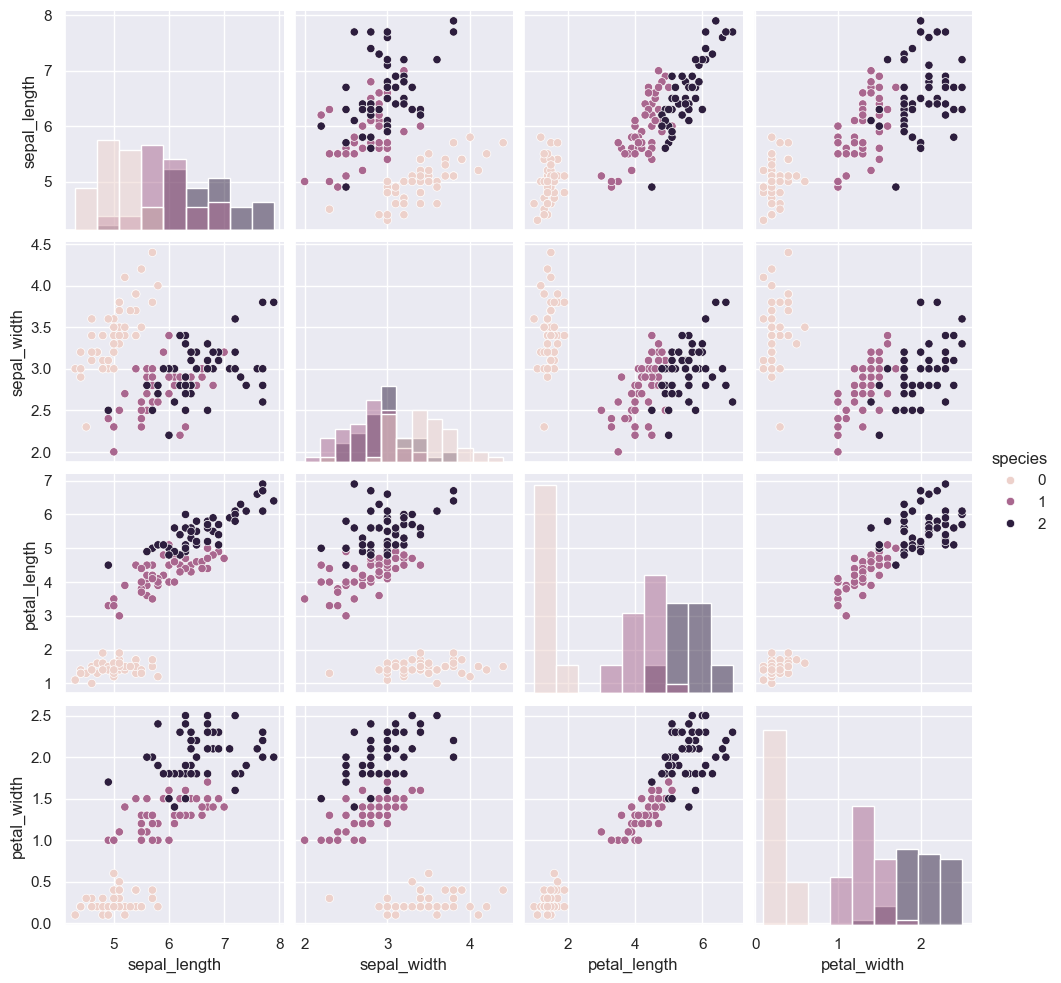

In [10]:
# グラフ（ペアプロット）による可視化
sns.pairplot(dataset, hue="species", diag_kind='hist')

## パーセプトロン

ここではパーセプトロンの単純な例として、 petal_length と petal_width を入力値として使い、花の種類がSetosaか、それ以外か の分類結果を出力するモデルを作成してみましょう。

2種類にグループ分けする分類問題を 二値分類 や 二項分類、 2クラス分類 と呼びます。

目的変数：花の種類がSetosaか、それ以外か
説明変数：petal_length, petal_width

### 二値分類の準備

In [11]:
#まずはdatasetに花の種類がSetosaかそれ以外かの列を追加。
# 「setosaかそれ以外か」の列（speciesが0ならTrue、それ以外ならFalseとするboolean値となるS）
is_setosa = (dataset['species'] == 0).astype(np.int64)

# datasetに追加
dataset['is_setosa'] = is_setosa
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


次に、petal_length, petal_width でsetosaを分類できるか、グラフにして確認してみましょう。seabornの lmplot を使うと、色分けした散布図を作成できます。

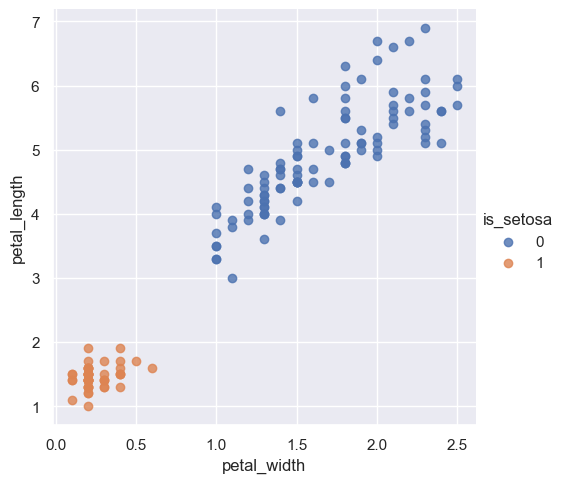

In [12]:
# setosaとそれ以外で分類した散布図
sns.lmplot(x='petal_width', y='petal_length', hue='is_setosa', data=dataset, fit_reg=False)

### パーセプトロンを使ってみよう

注：PythonでIrisの分類をしたときは、from sklearn.svm import SVCだったので違うモデルを使っていた。

In [13]:
# 必要なライブラリの追加読み込み
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [14]:
# 目的変数（Y）：is_setosa、説明変数（X）：petal_widthとpetal_length
Y = np.array(dataset['is_setosa'])
X = np.array(dataset[['petal_width', 'petal_length']])

In [15]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (150,) , X= (150, 2)


In [16]:
# データの分割(ホールドアウト法で行う)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

パーセプトロンは scikit-learn の Perceptron クラスを使います。

In [17]:
# パーセプトロンのモデルを作成し、学習して予測
perceptron_model = Perceptron()
perceptron_model.fit(X_train, Y_train)
Y_pred = perceptron_model.predict(X_valid)

In [18]:
# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

[0 1 0 1 0]
[0 1 0 1 0]


### モデルの確認

重みがどうなったか確認してみましょう。パーセプトロンは線形なので、重みは線形回帰モデルと同様にして取得できます。

In [19]:
# 重みの確認
w0 = perceptron_model.intercept_[0]
w1 = perceptron_model.coef_[0][0]
w2 = perceptron_model.coef_[0][1]

print("w0:", w0, ", w1:", w1, ", w2:", w2)

w0: 2.0 , w1: -1.2 , w2: -0.6999999999999997


intercept_[0] に (閾値)w0が、coef_[0][0] と coef_[0][1]に、それぞれ w1とw2 が格納されています。（補足：この実行例では w2 は -0.7に近い値となっていますが、乱数の初期値などにより実行ごとに値は変動する可能性があります。以下の説明では、この実行結果の例に基づき w2 = -0.7として進めます。）


petal_width と petal_length の散布図に、 w0 + w1x1 + w2x2 = 0 で表される直線を描いてみましょう。
変形すると、x2 = w0 + w1x1 / (-w2)

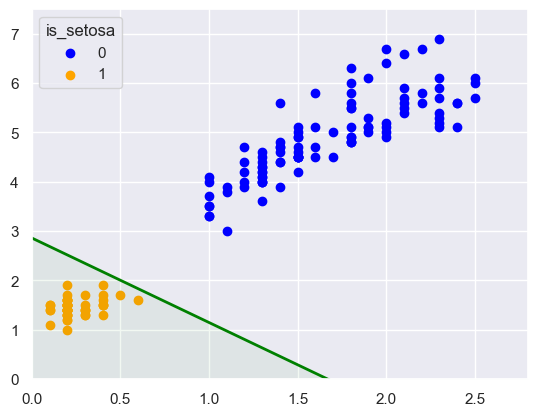

In [20]:
# モデルの式
# (numpy.linspaceは、指定した開始値から終了値までの範囲を、指定した個数で等分割する)
x1 = np.linspace(0, 3, 10)

x2 = (2 - 1.2 * x1) / 0.7

# 実際の値（setosa以外）
data = dataset.query("is_setosa == 0")
plt.scatter(data['petal_width'], data['petal_length'], color="blue", label="0")

# 実際の値（setosa)
data = dataset.query("is_setosa == 1")
plt.scatter(data['petal_width'], data['petal_length'], color="orange", label="1")

# モデルの式（setosaの部分）
plt.plot(x1, x2, color="green", linewidth=2)
plt.fill_between(x1, x2, color='green', linewidth=0, alpha=.05)

# グラフ全体の大きさを指定
plt.xlim(0, 2.8)
plt.ylim(0, 7.5)

# 凡例の表示
plt.legend(loc="upper left", title="is_setosa")

### モデルの評価

回帰モデルの評価は MSE(平均二乗誤差) を使って行いました。分類モデルの場合「どのぐらい正解しているか」が評価基準となります。観点によりいくつかの評価方法があります。このなかでは f1値 がもっとも多く使われます。順番に確認していきましょう。

- 正解率（Accuracy）: 全体のなかで正解したものの割合。正解率は scikit-learn の accuracy_score で求められる。または、モデルの score() を使用しても同様の結果となる。
- 適合率（Precision）:正解と判断した中で真に正解の割合。適合率は scikit-learn の precision_score で求められる。
- 再現率（Recall）: 真に正解のうち正解と判断した割合。再現率は scikit-learn の recall_score で求められる。
- f1値：F1値（F値）は、適合率と再現率の調和平均（逆数の平均を求め、それを逆数にした値）。F1値は scikit-learn の f1_score で求められる。

まとめて出力：scikit-learn の classification_report を使うと、上記の値をまとめて出力できます

In [21]:
# 正解率
from sklearn.metrics import accuracy_score

accuracy_score(Y_valid, Y_pred)

1.0

In [33]:
# モデルのscore関数による正解率
perceptron_model.score(X_valid, Y_valid)

1.0

In [22]:
# 適合率
from sklearn.metrics import precision_score

precision_score(Y_valid, Y_pred)

1.0

In [23]:
# 再現率
from sklearn.metrics import recall_score

recall_score(Y_valid, Y_pred)

1.0

In [24]:
# F1値
from sklearn.metrics import f1_score

f1_score(Y_valid, Y_pred)

1.0

In [25]:
# モデルの評価をまとめて出力
from sklearn.metrics import classification_report

print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## ロジスティック回帰

シグモイド関数とは、どのような入力値も 0から1の間 の値に変換する、アルファベットの「S」の形をした関数のことです。 
機械学習、特にロジスティック回帰やニューラルネットワークにおいて、非常に重要な役割を果たします。 
1. 主な特徴 
- 出力を0〜1に収める: 入力がどれだけ大きくても小さくても、出力は必ず 0.0 から 1.0 の範囲に収まります。
- 確率として解釈できる: 出力が 0〜1 であるため、「あるクラスに属する確率（例：80%の確率で Setosa である、など）」として扱うのに最適です。
- 滑らかな変化: 入力が 0 付近のときに最も変化が大きく、極端な値になると変化が緩やか（飽和）になります。 

2. 数式 数学的には以下の式で表されます。
    f(x)=1 / (1+e^-x)
    ここでのeはネイピア数（約2.718）です。 

3. なぜ使うのか？ 
- 二値分類の判定: 先ほどのコードのように「Setosa かどうか」を判定する場合、最終的なスコアをシグモイド関数に通すことで、「はい(1)」か「いいえ(0)」かの確率を算出できます。
- 非線形性の導入: 単純な足し算・掛け算（線形）だけでは解けない複雑なパターンを、AIが学習できるようにするために使用されます。

線形回帰モデルの目的関数は誤差の2乗の合計を最小化するものだったが、ロジスティック回帰の出力は確率なので、目的関数も 「分類が正解となる確率」を最大化する ものとする。数式で表すとき、尤度(Likelihood)関数が使われる。ただ、尤度関数は確率の掛け合わせなので、値がものすごく小さくなる。そのため実際に計算する際は対数を取った 対数尤度関数 が良く使われる。

また、同様の指標で 交差エントロピー（crossentropy、交差エントロピー誤差）というものもあり。交差エントロピーとは2つの確率分布の距離を表したもので目的変数と予測値との距離のようなもの（具体的には、交差エントロピーは対数尤度関数にマイナスを掛けたもの）。

In [26]:
# 必要なライブラリの追加読み込み
from sklearn.linear_model import LogisticRegression

### 二値分類

In [27]:
# ロジスティック回帰のモデルを作成し、学習して予測
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### 多クラス分類

ロジスティック回帰では多クラス分類を行うことができます。モデルの出力は 各クラスに属する確率 となるように拡張されています。このように「各クラスに属する確率」を表現できるように拡張した関数を ソフトマックス関数（softmax）と呼びます。ソフトマックス関数は、ディープラーニングの分類モデルなど、機械学習で多く用いられている関数の1つです。

In [28]:
# Y:目的変数、X:説明変数
Y = np.array(dataset['species'])
X = np.array(dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [29]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [30]:
# ロジスティック回帰（多クラス分類）のモデルを作成し、学習して予測
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## 決定木

See note.

ちなみに決定木は、データのまとまりがなるべく単一のカテゴリーになるように、データを分割します。データに他のカテゴリーの値が入っている割合を 不純度 と呼びます。この不純度がなるべく小さくなるようにデータを分割します。今回の例ではデータを分割する基準（不純度）の計算式に交差エントロピーを指定しています（criterion='entropy'）。

In [31]:
# 必要なライブラリの追加読み込み
from sklearn.tree import DecisionTreeClassifier

In [32]:
# 決定木のモデルを作成し、学習して予測
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.96      0.96      0.96        32
weighted avg       0.97      0.97      0.97        32



これまでのモデルより少し性能が悪いようです。前のレッスンで学んだグリッドサーチを使ってパラメータをチューニングしてみましょう。

In [33]:
# グリッドサーチを使う
from sklearn.model_selection import GridSearchCV

# モデル:決定木
model = DecisionTreeClassifier()

# max_depth:木の深さ, min_samples_split:ノードを分割するために必要なデータの数
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# グリッドサーチ
gscv = GridSearchCV(model, param_grid=params, cv=3)

# データの分割:機械学習用データを学習と検証に分けるのはクロスバリデーションで行ってくれる
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X, Y, test_size=0.3, random_state=0)

gscv.fit(Xg_train, Yg_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40,
                                       50],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [34]:
# 最適なパラメータ
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4}

In [35]:
# 最適なパラメータによる決定木のモデル作成と学習、予測(テキスト)
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10)
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [37]:
# 最適なパラメータによる決定木のモデル作成と学習、予測（実際に自分で試した結果）
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4)
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## ランダムフォレスト

ランダムフォレストとは、複数の決定木を組み合わせて予測性能を高くしたモデルです。

- 複数の決定木モデルを用意する
- それぞれの決定木の学習データは、もとの学習データから重複を許して同じ数をランダムに抽出したものを使用する（決定木ごとに微妙に学習データを変えることで学習のバリエーションを増やす）
- 予測には、各決定木の予測結果の「多数決」を用いる

ランダムフォレストの考え方は「予測性能の低いモデル（決定木）を組み合わせて予測性能の高いモデルをつくる」というものです。このような方法を一般に、アンサンブル学習（ensemble learning）と呼びます。

In [39]:
# 必要なライブラリの追加読み込み
from sklearn.ensemble import RandomForestClassifier

In [41]:
# ランダムフォレストのモデルを作成し、学習して予測
#「n_estimators」は木の数を指定するパラメータ。
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.93      0.93      0.92        32
weighted avg       0.95      0.94      0.94        32



In [70]:
# グリッドサーチを使う
# モデル:ランダムフォレスト
model = RandomForestClassifier()

# パラメータ:n_estimators:木の数、max_depth:木の深さ
params = {'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50]}

# グリッドサーチ
gscv = GridSearchCV(model, param_grid=params, cv=3)

# データの分割:機械学習用データを学習と検証に分けるのはクロスバリデーションで行ってくれる
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X, Y, test_size=0.3, random_state=0)

gscv.fit(Xg_train, Yg_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]})

In [71]:
# 最適なパラメータ
gscv.best_params_

{'max_depth': 7, 'n_estimators': 9}

In [57]:
# 最適なパラメータによるランダムフォレストのモデル作成と学習、予測(テキスト)
randomforest_model = RandomForestClassifier(n_estimators=100, max_depth=5)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.93      0.93      0.92        32
weighted avg       0.95      0.94      0.94        32



In [72]:
# 最適なパラメータによるランダムフォレストのモデル作成と学習、予測(実際に自分で試した結果)
randomforest_model = RandomForestClassifier(n_estimators=9, max_depth=7)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.93      0.93      0.92        32
weighted avg       0.95      0.94      0.94        32



## サポートベクターマシン（SVM）

比較的高速で高い性能を出せるのがサポートベクターマシン（SVM）です。

SVMとは、マージンを最大化するようにデータを分割する境界線を決定するモデルです。

ここで、分割線を決めるのに重要なのは 分割線から近いデータ です。この分割線から近いデータを サポートベクトル と呼びます。
サポートベクトルからのマージンが最大になるように分割線を決める、というのが基本的な考え方です。

SVMは分割境界を決定するためにサポートベクトルのみを考慮するため、特にデータが高次元であっても効率的に学習できる場合があり、計算量が比較的少ないという特徴につながることがあります。



<非線形の分類への応用>
線形SVMでは直線でデータを分割します。直線で分割できない 非線形の分類 へ対応するために、SVMではカーネル法（カーネルトリック）という手法で 学習データを変換してから モデルに学習させる、という方法を取ります。



<多クラス分類への応用>
複数のSVMを組み合わせることで多クラス分類モデルを実現できます。例として A, B, C の3つに分類したい場合は、以下のどちらかの方法となります。両者とも予測時にはそれらのモデルの多数決で分類を決めます。

- すべての組み合わせの3つのモデルを作成
「A, B」,「A, C」,「B, C」
- 1つとそれ以外の組み合わせの3つのモデルを作成
「A, BC」,「B, AC」,「C, AB」

In [74]:
# 必要なライブラリの追加読み込み
from sklearn.svm import SVC

In [78]:
# SVMのモデルを作成し、学習して予測
svm_model = SVC()
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [80]:
# テストデータによる評価
Y_pred = svm_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

